# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Re-initialize the browser and visit the website
browser = Browser('chrome')
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')




In [5]:
# Extract all rows of data and skip header row
all_row_data = soup.select("table.table > tbody > tr.data-row") 
print(len(all_row_data))

1867


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
weather_data = []

# Loop through the scraped data to create a list of rows
for row_data in all_row_data:
    row_value = []
    for td in row_data.select("td"):
        row_value.append(td.text)
    weather_data.append(row_value)


In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_df = pd.DataFrame(weather_data, columns=["id", "terrestrial_date", "sol", "ls", "month", "min_temp", "pressure"])



In [8]:
# Confirm DataFrame was created successfully
mars_df.head()


,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
mars_df.dtypes


id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [10]:
# Change data types for data analysis
mars_df = mars_df.astype({"id": int,
                "terrestrial_date": "datetime64[ns]",
                "sol": int,
                "ls": int,
                "month": int,
                "min_temp": float,
                "pressure": float})

In [11]:
# Confirm type changes were successful by examining data types again
mars_df.dtypes

id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [12]:
# 1. How many months are there on Mars?
# Count the number of unique months
months = mars_df["month"].nunique()
months



12

In [13]:
# 2. How many sols (Martian days) worth of data are there?
# Count the number of unique sols
sols = mars_df["sol"].nunique()
sols


1867

In [14]:
# 3. What is the average minimum temperature by month?
# Group the data by month and calculate the average minimum temperature
avg_min_temp = mars_df.groupby("month")["min_temp"].mean()
avg_min_temp


month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

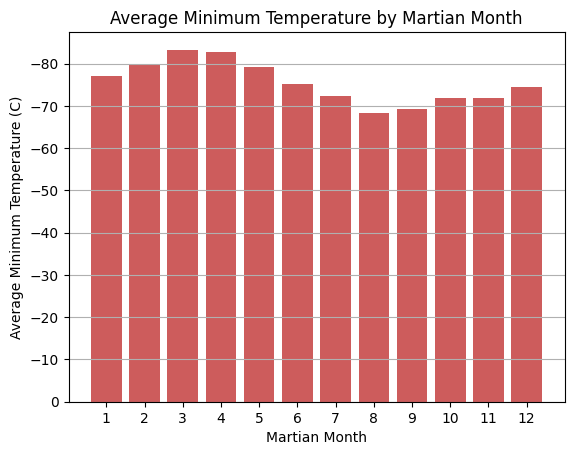

In [15]:
# Plot the average minimum temperature by month
plt.bar(avg_min_temp.index, avg_min_temp, color="indianred")
plt.title("Average Minimum Temperature by Martian Month")
plt.xlabel("Martian Month")
plt.ylabel("Average Minimum Temperature (C)")
plt.grid(axis="y")

#ensure all martian months are displayed
plt.xticks(range(1, 13))

#invert the y-axis
plt.gca().invert_yaxis()

#show the graph
plt.show()



In [16]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
avg_min_temp.sort_values()
max_temp = avg_min_temp.max()
min_temp = avg_min_temp.min()

# identify the month with the lowest pressure
min_temp_month = avg_min_temp.idxmin()

#identify the month with the highest pressure
max_temp_month = avg_min_temp.idxmax()

# Print the coldest and hottest months
print(f"Month {min_temp_month} is the coldest with an average minimum temperature of {min_temp} C.")
print(f"Month {max_temp_month} is the hottest and has an average minimum temperature of {max_temp} C.")


Month 3 is the coldest with an average minimum temperature of -83.30729166666667 C.
Month 8 is the hottest and has an average minimum temperature of -68.38297872340425 C.


In [17]:
# 4. What is the average pressure by month?
# Group the data by month and calculate the average pressure
avg_pressure = mars_df.groupby("month")["pressure"].mean()

avg_pressure



month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

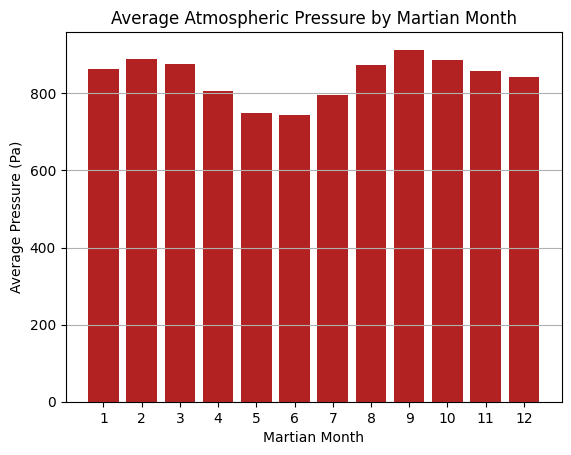

In [18]:
# Plot the average pressure by month in a bar chart
plt.bar(avg_pressure.index, avg_pressure, color="firebrick")
plt.title("Average Atmospheric Pressure by Martian Month")
plt.xlabel("Martian Month")
plt.ylabel("Average Pressure (Pa)")
plt.grid(axis="y")

#ensure all martian months are displayed
plt.xticks(range(1, 13))

#show the graph
plt.show()


In [19]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
avg_pressure.sort_values()
max_pressure = avg_pressure.max()
min_pressure = avg_pressure.min()

# identify the month with the lowest pressure
min_pressure_month = avg_pressure.idxmin()

#identify the month with the highest pressure
max_pressure_month = avg_pressure.idxmax()

# Print the lowest and highest pressure months
print(f"The month with the lowest average pressure is the {min_pressure_month}th month with an average of {min_pressure} Pa.")
print(f"The month with the highest average pressure is the {max_pressure_month}th month with an average of {max_pressure} Pa.")



The month with the lowest average pressure is the 6th month with an average of 745.0544217687075 Pa.
The month with the highest average pressure is the 9th month with an average of 913.3059701492538 Pa.


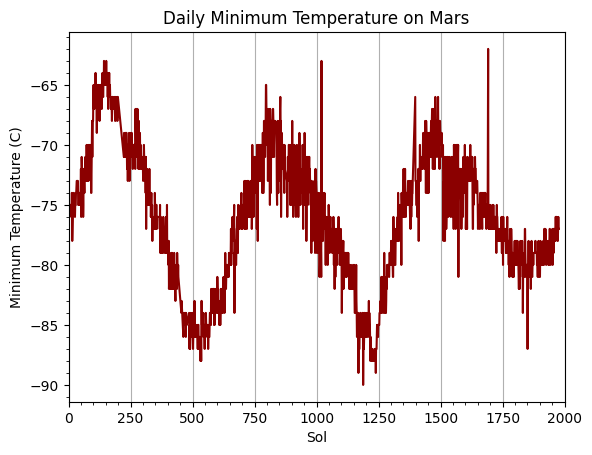

In [20]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Calculate the number of terrestrial days in a Martian year
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
plt.plot(mars_df["sol"], mars_df["min_temp"], color="darkred")
plt.title("Daily Minimum Temperature on Mars")
plt.xlabel("Sol")
plt.ylabel("Minimum Temperature (C)")
plt.grid(True, axis="x")
plt.xlim(0,2000)
plt.minorticks_on()
plt.show()

#### Minimum Temperature

Month 3 is the coldest with an average minimum temperature of -83.30729166666667 C.
Month 8 is the hottest and has an average minimum temperature of -68.38297872340425 C.

#### Atmospheric Pressure

The month with the lowest average pressure is the 6th month with an average of 745.0544217687075 Pa.
The month with the highest average pressure is the 9th month with an average of 913.3059701492538 Pa.

#### Year Length

The minimum temperature line graph suggests that Mars experiences seasonal variations analogous to those observed in Earth's atmosphere. By analyzing the temperature values from one peak to the next (range from 750 to 1500), we can deduce that a Martian year comprises approximately 700 terrestrial days.

To verify, I searched NASA's website; according to NASA, there are 669.6 sols in a Martian year, which is the same as 687 Earth days.
Source: https://science.nasa.gov/mars/facts/

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [21]:
# Write the data to a CSV
mars_df.to_csv("mars_weather_data.csv", header=True, index=False, date_format="%Y-%m-%d")

In [22]:
browser.quit()